## Offensive Language Dataset Visualization: Word Clouds & Most Commun Words

### Import dataset

In [83]:
import pandas as pd
df = pd.read_csv('Dataset/CVMAD_04.csv', encoding='UTF-8')### if it doesn' work try 'utf-8-sig'
df.head()

,content,decision
0,یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهت...,1
1,یاک مطلقها علاش کیحاسبها داب,1
2,یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعص...,1
3,يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح الت...,0
4,يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب ا...,0


### Text preprocessing

In [3]:
import re

#### Remove noisy elements

In [57]:
def removeWeirdChars(text):
    weirdPatterns = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u'\U00010000-\U0010ffff'
                               u"\u200d"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\u3030"
                               u"\ufe0f"
                               u"\u2069"
                               u"\u2066"
                               u"\u200c"
                               u"\u2068"
                               u"\u2067"
                               "]+", flags=re.UNICODE)
    return weirdPatterns.sub(r'', text)

In [84]:
Clean_cmts = [removeWeirdChars(input_str) for input_str in df.content]

In [85]:
print(*Clean_cmts[0:5], sep = "\n")

یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهتو المغرب
یاک مطلقها علاش کیحاسبها داب
یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعصیه قبل اقترافها۔هادا حال نکبة الانترنت صار وسیله للتفاخر بالجریمه والمعصیه قبل الاقدام علیها۔بالامس القریب انتحر شاب بمقتبل العمر بتطوان وقبل الانتحار کتب او تفاخر بلفیس انه مل من لحیاة وسینتحر والیوم واحد مدمن مقرقب حباس یبرر تشریمله لزوجته وینشر وساخة غسیله امام الناس قبل ان یشرمل زوجته ولم یستحي هذا الدیوث حتی ان یستر او یغطي صدر زوجته وهي بقمیص نوم شفاف امام الکل وغدا ربما سیدخل علینا قاضي بفیدیو یعلن ان لمحکمة عمرات بقضایا وملفات الحباسه ولمشرملین ویصدر احکامه هنا مسبقا عن کل واحد شرمل او اغتصب ولاداعي للمحکمه۔انه زمن التفاهة وغیاب الوعي ولعدل وتوافر کل اسباب الراحه والترفیه بالسجون المغربیه۔
يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح التصويت نزيه بالمغرب بدلاً من 200درهم في 4سنوات للفرد من الأخر وشكرا
يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب الملكي


#### Remove punctuation

In [86]:
import string
Clean_cmts =[Clean_cmt.translate(str.maketrans('', '', string.punctuation)) for Clean_cmt in Clean_cmts]
print(*Clean_cmts[0:5], sep = "\n")

یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهتو المغرب
یاک مطلقها علاش کیحاسبها داب
یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعصیه قبل اقترافها۔هادا حال نکبة الانترنت صار وسیله للتفاخر بالجریمه والمعصیه قبل الاقدام علیها۔بالامس القریب انتحر شاب بمقتبل العمر بتطوان وقبل الانتحار کتب او تفاخر بلفیس انه مل من لحیاة وسینتحر والیوم واحد مدمن مقرقب حباس یبرر تشریمله لزوجته وینشر وساخة غسیله امام الناس قبل ان یشرمل زوجته ولم یستحي هذا الدیوث حتی ان یستر او یغطي صدر زوجته وهي بقمیص نوم شفاف امام الکل وغدا ربما سیدخل علینا قاضي بفیدیو یعلن ان لمحکمة عمرات بقضایا وملفات الحباسه ولمشرملین ویصدر احکامه هنا مسبقا عن کل واحد شرمل او اغتصب ولاداعي للمحکمه۔انه زمن التفاهة وغیاب الوعي ولعدل وتوافر کل اسباب الراحه والترفیه بالسجون المغربیه۔
يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح التصويت نزيه بالمغرب بدلاً من 200درهم في 4سنوات للفرد من الأخر وشكرا
يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب الملكي


#### Count the portion of comments written in Arabic and Latin script

In [94]:
# Remove all script except Arabic
Arabic_cmts = [re.sub(r'[^0-9\u0600-\u06ff\u0750-\u077f\ufb50-\ufbc1\ufbd3-\ufd3f\ufd50-\ufd8f\ufd50-\ufd8f\ufe70-\ufefc\uFDF0-\uFDFD]+', ' ', input_str) for input_str in Clean_cmts]

In [95]:
[print(i) for i in Arabic_cmts[0:10]]

یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهتو المغرب
یاک مطلقها علاش کیحاسبها داب
یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعصیه قبل اقترافها۔هادا حال نکبة الانترنت صار وسیله للتفاخر بالجریمه والمعصیه قبل الاقدام علیها۔بالامس القریب انتحر شاب بمقتبل العمر بتطوان وقبل الانتحار کتب او تفاخر بلفیس انه مل من لحیاة وسینتحر والیوم واحد مدمن مقرقب حباس یبرر تشریمله لزوجته وینشر وساخة غسیله امام الناس قبل ان یشرمل زوجته ولم یستحي هذا الدیوث حتی ان یستر او یغطي صدر زوجته وهي بقمیص نوم شفاف امام الکل وغدا ربما سیدخل علینا قاضي بفیدیو یعلن ان لمحکمة عمرات بقضایا وملفات الحباسه ولمشرملین ویصدر احکامه هنا مسبقا عن کل واحد شرمل او اغتصب ولاداعي للمحکمه۔انه زمن التفاهة وغیاب الوعي ولعدل وتوافر کل اسباب الراحه والترفیه بالسجون المغربیه۔
يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح التصويت نزيه بالمغرب بدلاً من 200درهم في 4سنوات للفرد من الأخر وشكرا
يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب الملكي
يوسف رجل
يوسف الزروالي هو لي دخلو لي جمعية شباب الملكي
يوزع شكون فيق سكيزو من السبات
يوتيب تسبب ليا ب

[None, None, None, None, None, None, None, None, None, None]

In [96]:
Arabic_cmts_filtered = [cmt for cmt in Arabic_cmts if re.match(r'[^0-9\s*$]',cmt)]
Arabic_cmts_count = len(Arabic_cmts_filtered)

In [97]:
# the amount of comments written in Arabic script
print(Arabic_cmts_count)

15694


In [98]:
print(*Arabic_cmts_filtered[0:10], sep ="\n")

یخ علی الخماح مخسر للسیده وجها مازال کتهضرشوهتو المغرب
یاک مطلقها علاش کیحاسبها داب
یاخوفي من بدعة التفاخر بالقتل والتشرمیل والمعصیه قبل اقترافها۔هادا حال نکبة الانترنت صار وسیله للتفاخر بالجریمه والمعصیه قبل الاقدام علیها۔بالامس القریب انتحر شاب بمقتبل العمر بتطوان وقبل الانتحار کتب او تفاخر بلفیس انه مل من لحیاة وسینتحر والیوم واحد مدمن مقرقب حباس یبرر تشریمله لزوجته وینشر وساخة غسیله امام الناس قبل ان یشرمل زوجته ولم یستحي هذا الدیوث حتی ان یستر او یغطي صدر زوجته وهي بقمیص نوم شفاف امام الکل وغدا ربما سیدخل علینا قاضي بفیدیو یعلن ان لمحکمة عمرات بقضایا وملفات الحباسه ولمشرملین ویصدر احکامه هنا مسبقا عن کل واحد شرمل او اغتصب ولاداعي للمحکمه۔انه زمن التفاهة وغیاب الوعي ولعدل وتوافر کل اسباب الراحه والترفیه بالسجون المغربیه۔
يوم يكون الصوت سعره يتحدى 30درهم هنا سيصبح التصويت نزيه بالمغرب بدلاً من 200درهم في 4سنوات للفرد من الأخر وشكرا
يوسف زروالي هو لقتقصدك لدخلو معاه جميعة شباب الملكي
يوسف رجل
يوسف الزروالي هو لي دخلو لي جمعية شباب الملكي
يوزع شكون فيق سكيزو من السبات
يوتيب تسبب ليا ب

#### Count the number of script swithcing comments

In [174]:
#ScriptSwtch_cmts = [cmt for cmt in Clean_cmts if re.fullmatch(r'[0-9 a-z | u0621-\u064A\u0660-\u0669]',cmt)]
#ScriptSwtch_cmts = [cmt for cmt in Clean_cmts if re.match(r'[A-Za-z0-9ء-ي]+/g', cmt)]
if df.content.str.contains(r'[A-Za-z]') and df.content.str.contains(r'[ء-ي]'):
    ScriptSwtch_cmts = df.content 

ScriptSwtch_cmts_count = len(ScriptSwtch_cmts)
print(ScriptSwtch_cmts_count)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [161]:
ScriptSwtch_cmts[-1]

IndexError: list index out of range

### Count Words Frequency

In [100]:
## Most commun words

# we need to create a document term matrix using CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_words(corpus, n=None):

    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in  vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)
    words_distr = [(word, words_freq/len(vec.vocabulary_)) for word, words_freq in words_freq]
    words_distr = sorted(words_distr, key = lambda x: x[1], reverse = True)
    print(len(vec.vocabulary_))
    return words_freq[:n], words_distr[:n]

In [101]:
#We inspect the top word in a sample from our corpus without stemming the words
n=200
topWords, distr =get_top_n_words(Clean_cmts,n)
#print(topWords)

73804


In [102]:
print(distr)

[('الله', 0.06660885588856973), ('من', 0.044807869492168445), ('على', 0.04197604465882608), ('في', 0.03594656116199664), ('لي', 0.024985095658771883), ('هاد', 0.020513793290336566), ('عليك', 0.019822773833396565), ('غير', 0.017600672050295377), ('انت', 0.01718064061568479), ('شي', 0.01577150289957184), ('ما', 0.01577150289957184), ('لا', 0.013820389138800066), ('ولا', 0.012614492439434176), ('يا', 0.012465449027153), ('ديال', 0.012099615197008293), ('بحال', 0.011950571784727115), ('هو', 0.011815077773562409), ('حتى', 0.011584737954582407), ('واش', 0.011110508915505935), ('3la', 0.010433038859682402), ('راه', 0.01039239065633299), ('والله', 0.010283995447401224), ('انا', 0.010216248441818872), ('nta', 0.010216248441818872), ('او', 0.009823315809441223), ('سير', 0.009823315809441223), ('هي', 0.009823315809441223), ('had', 0.00978266760609181), ('مع', 0.0097420194027424), ('هذا', 0.009525228984878868), ('واحد', 0.009091648149151808), ('li', 0.009078098748035337), ('الناس', 0.0088884071324

In [7]:
# words whitout frequence
words = [w[0] for w in topWords]
print(words)

['الله', 'من', 'على', 'في', 'لي', 'هاد', 'عليك', 'غير', 'انت', 'ما', 'شي', 'لا', 'ولا', 'يا', 'ديال', 'بحال', 'هو', 'حتى', 'واش', '3la', 'راه', 'والله', 'nta', 'انا', 'هي', 'او', 'سير', 'had', 'مع', 'هذا', 'واحد', 'li', 'الناس', 'نتا', 'ماشي', 'تفو', 'lah', 'باش', 'راجل', 'بزاف', 'كل', 'ليك', '3lik', 'اللي', 'فيه', 'يعطيك', 'كان', 'اش', 'راك', 'فيها', 'علاش', 'فيك', 'هدا', 'مريم', 'عليه', 'ana', 'ولكن', 'عليها', 'راسك', 'المغرب', 'la', 'مالك', 'chi', 'وانت', 'ربي', 'الا', 'عليكم', 'talib', 'شكون', 'allah', 'ديالك', 'mc', 'الحق', 'sir', 'ya', 'حيت', 'رزقها', 'خويا', 'hada', 'رضوان', 'الصحة', 'الي', 'بنت', 'بالله', 'غادي', 'ليه', 'أو', 'ان', 'كون', 'عندك', 'تبارك', 'حاجة', 'لك', 'الشعب', 'ولد', 'هادشي', 'wa', 'عندو', 'طاليب', 'الى', 'كلشي', 'rah', 'ناري', 'ou', 'غي', 'هد', 'نصاب', 'mn', 'بغيت', 'ليها', 'والو', 'رجع', 'ghir', 'tfo', 'السلام', 'دير', 'سعيد', 'سكيزوفرين', 'كنت', 'dyal', 'زامل', 'شحال', 'مسكينة', 'rak', 'machi', 'ناس', 'باين', 'بلا', 'تكون', 'السيدة', 'ليا', 'البنات', 'أنا',

In [67]:
# get the 200 most frequent words and save them in a file to serve as stop word list for Moroccan Arabic
with open(r'MAStopWords.txt', 'w', encoding='UTF-8') as f:
    f.write("\n".join(str(w) for w in words))
    print('Done')

Done


In [8]:
print(topWords)

[('الله', 4919), ('من', 3306), ('على', 3098), ('في', 2653), ('لي', 1845), ('هاد', 1514), ('عليك', 1463), ('غير', 1299), ('انت', 1269), ('ما', 1166), ('شي', 1164), ('لا', 1020), ('ولا', 931), ('يا', 920), ('ديال', 893), ('بحال', 882), ('هو', 873), ('حتى', 855), ('واش', 821), ('3la', 770), ('راه', 767), ('والله', 759), ('nta', 757), ('انا', 754), ('هي', 727), ('او', 727), ('سير', 726), ('had', 723), ('مع', 719), ('هذا', 704), ('واحد', 671), ('li', 669), ('الناس', 656), ('نتا', 618), ('ماشي', 610), ('تفو', 606), ('lah', 599), ('باش', 588), ('راجل', 563), ('بزاف', 555), ('كل', 548), ('ليك', 543), ('3lik', 532), ('اللي', 528), ('فيه', 516), ('يعطيك', 504), ('كان', 481), ('اش', 459), ('راك', 445), ('فيها', 445), ('علاش', 443), ('فيك', 441), ('هدا', 438), ('مريم', 437), ('عليه', 436), ('ana', 430), ('ولكن', 429), ('عليها', 425), ('راسك', 417), ('المغرب', 416), ('la', 393), ('مالك', 386), ('chi', 382), ('وانت', 374), ('ربي', 370), ('الا', 365), ('عليكم', 361), ('talib', 356), ('شكون', 354), ('

### Word Clouds

In [4]:
!pip install python-bidi
!pip install arabic_reshaper

You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\dell\anaconda3\python.exe -m pip install --upgrade pip' command.


In [9]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
import arabic_reshaper
from wordcloud import WordCloud, STOPWORDS

In [10]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [11]:
#read MA stop words
f = open(r'MAStopWords.txt', 'r', encoding='UTF-8')
ma_stop_words = [line.rstrip() for line in f]

In [12]:
#get arabic stop word from NLTK, then add MA and arabic stop words to English ones  
arb_stop_words = list(set(nltk.corpus.stopwords.words("arabic")))
STOPWORDS.update(ma_stop_words + arb_stop_words)

In [13]:
stop_words = set(STOPWORDS)

In [14]:
import numpy as np

In [15]:
#remove stop words from comments
def remove_stopword(text, stop_words):
    comment_words = ''
    for val in text:
     
        # typecaste each val to string
        val = str(val)
 
        # split the value
        tokens = val.split()
        tokens = [t for t in tokens if t not in stop_words]
        comment_words += " ".join(tokens)+" "
    return comment_words

In [16]:
text = removeWeirdChars(remove_stopword(df.content, stop_words))

In [191]:
data = arabic_reshaper.reshape(text)
data = get_display(data)

In [192]:
print(get_display(data[0:100]))

Wa chn ﺣﺮﻛﺘﻲ ﻓﻴﺎ ﺣﻴﻮﺍﻳﺞ ﺟﺎﺗﻨﻲ ﺍﻟﺮﻏﺒﺔ ﻧﻮﺽ ﻧﺤﻔﻆ ﻓﻬﺎﺩ ٣ ﺗﻜﻠﻢ ﺍﻟﻤﻮﺿﻊ ﺧﺼﻚ ﻭﻣﺘﺒﻘﺎﺵ ﺩﺧﻞ ﺍﻟﻔﺮﻭﻧﺴﻲ ﺭﺍﻛﻲ ﺑﻼﺩﻙ 


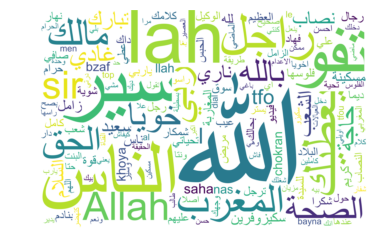

<Figure size 432x288 with 0 Axes>

In [193]:
from wordcloud import WordCloud

WordCloud = WordCloud(font_path='arial.ttf', 
                      background_color='white',
                      max_words=150, 
                      mode='RGB', 
                      width=3000, 
                      height=2000,
                      collocations=False,
                      stopwords=STOPWORDS).generate(data)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()


In [194]:
WordCloud.to_file('MAOffens_wordCloud.png')

In [41]:
topFreqWords, topDistrWords=get_top_n_words([text],100)
print(topFreqWords)

[('الله', 4919), ('سير', 726), ('الناس', 656), ('تفو', 606), ('lah', 599), ('راجل', 563), ('يعطيك', 504), ('المغرب', 416), ('مالك', 386), ('ربي', 370), ('allah', 352), ('الحق', 344), ('sir', 343), ('خويا', 324), ('الصحة', 315), ('بالله', 303), ('غادي', 301), ('تبارك', 286), ('حاجة', 286), ('الشعب', 285), ('ناري', 254), ('نصاب', 245), ('tfo', 229), ('السلام', 226), ('سعيد', 225), ('سكيزوفرين', 222), ('زامل', 220), ('مسكينة', 220), ('ناس', 218), ('كريم', 201), ('لله', 197), ('المغاربة', 187), ('قوة', 177), ('فلوسها', 177), ('saha', 175), ('mc', 169), ('nta', 167), ('ياربي', 160), ('ana', 159), ('hh', 158), ('بنادم', 156), ('كلامك', 153), ('صافي', 153), ('رجال', 152), ('داك', 151), ('شمكار', 151), ('ديما', 150), ('سوق', 149), ('khoya', 148), ('للسيدة', 148), ('فيديو', 147), ('مريض', 147), ('العظيم', 145), ('البلاد', 144), ('ترجل', 143), ('bzaf', 143), ('نهار', 142), ('كامل', 142), ('تحياتي', 142), ('شكرا', 142), ('علي', 140), ('فهاد', 140), ('chokran', 139), ('شعب', 138), ('الوكيل', 138),

Get most frequent words for offensive comments 

In [18]:
offens_comments = df.loc[df['decision'] == 1, 'content']
clean_offens_comments = removeWeirdChars(remove_stopword(offens_comments, stop_words))

In [42]:
offens_topFreqWords, offens_topDistrWords =get_top_n_words([clean_offens_comments],30)
print(offens_topFreqWords)

[('الله', 2314), ('سير', 648), ('تفو', 587), ('راجل', 467), ('الناس', 390), ('مالك', 333), ('sir', 327), ('lah', 282), ('يعطيك', 259), ('نصاب', 244), ('الحق', 228), ('tfo', 223), ('زامل', 220), ('المغرب', 196), ('ربي', 184), ('سعيد', 165), ('الشعب', 162), ('غادي', 162), ('ناري', 155), ('كريم', 149), ('حاجة', 148), ('شمكار', 146), ('nta', 143), ('بالله', 142), ('النصاب', 131), ('ترجل', 130), ('مريض', 128), ('مسكينة', 128), ('allah', 124), ('الزامل', 124)]


In [43]:
for w in offens_topDistrWords:
    print(w)

('الله', 0.04985457287514812)
('سير', 0.013961003985780459)
('تفو', 0.012646773672304212)
('راجل', 0.010061402563826349)
('الناس', 0.008402456102553054)
('مالك', 0.007174404826026069)
('sir', 0.007045136270602176)
('lah', 0.0060756221049229776)
('يعطيك', 0.00558009264246472)
('نصاب', 0.005256921253904988)
('الحق', 0.0049122051061079395)
('tfo', 0.004804481309921361)
('زامل', 0.004739847032209415)
('المغرب', 0.004222772810513842)
('ربي', 0.003964235699666056)
('سعيد', 0.0035548852741570615)
('الشعب', 0.0034902509964451147)
('غادي', 0.0034902509964451147)
('ناري', 0.003339437681783906)
('كريم', 0.003210169126360013)
('حاجة', 0.0031886243671226974)
('شمكار', 0.0031455348486480665)
('nta', 0.0030809005709361197)
('بالله', 0.0030593558116988042)
('النصاب', 0.0028223634600883334)
('ترجل', 0.002800818700851018)
('مريض', 0.002757729182376387)
('مسكينة', 0.002757729182376387)
('allah', 0.0026715501454271247)
('الزامل', 0.0026715501454271247)


In [47]:
pd.DataFrame(offens_topDistrWords).to_csv("OffensTopFreqWords.csv",encoding='utf-8-sig')

Get most frequent words for non-offensive comments 

In [24]:
non_offens_comments = df.loc[df['decision'] == 0, 'content']
clean_non_offens_comments = removeWeirdChars(remove_stopword(non_offens_comments, stop_words))

In [44]:
non_offens_topFreqWords, non_offens_topDistrWords=get_top_n_words([clean_non_offens_comments],30)
print(non_offens_topFreqWords)

[('الله', 2605), ('lah', 317), ('الصحة', 277), ('تبارك', 266), ('الناس', 266), ('خويا', 248), ('يعطيك', 245), ('allah', 228), ('المغرب', 220), ('السلام', 191), ('ربي', 186), ('saha', 164), ('بالله', 161), ('غادي', 139), ('chokran', 138), ('حاجة', 138), ('شكرا', 130), ('ana', 124), ('الشعب', 123), ('سكيزوفرين', 117), ('تحياتي', 117), ('لله', 116), ('الحق', 116), ('hh', 106), ('khoya', 106), ('بسطيلة', 104), ('تحية', 103), ('ناس', 101), ('قوة', 99), ('ديما', 99)]


In [45]:
for w in non_offens_topDistrWords:
    print(w)

('الله', 0.06540953146185909)
('lah', 0.007959624365992065)
('الصحة', 0.006955255360819565)
('تبارك', 0.0066790538843971275)
('الناس', 0.0066790538843971275)
('خويا', 0.006227087832069502)
('يعطيك', 0.0061517601566815645)
('allah', 0.005724903329483252)
('المغرب', 0.005524029528448752)
('السلام', 0.0047958619996986895)
('ربي', 0.004670315874052127)
('saha', 0.004117912921207252)
('بالله', 0.004042585245819314)
('غادي', 0.0034901822929744386)
('chokran', 0.003465073067845126)
('حاجة', 0.003465073067845126)
('شكرا', 0.0032641992668106263)
('ana', 0.003113543916034751)
('الشعب', 0.0030884346909054385)
('سكيزوفرين', 0.0029377793401295636)
('تحياتي', 0.0029377793401295636)
('لله', 0.002912670115000251)
('الحق', 0.002912670115000251)
('hh', 0.002661577863707126)
('khoya', 0.002661577863707126)
('بسطيلة', 0.002611359413448501)
('تحية', 0.0025862501883191884)
('ناس', 0.0025360317380605634)
('قوة', 0.0024858132878019384)
('ديما', 0.0024858132878019384)


In [46]:
pd.DataFrame(non_offens_topDistrWords).to_csv("NonOffensTopFreqWords.csv",encoding='utf-8-sig')

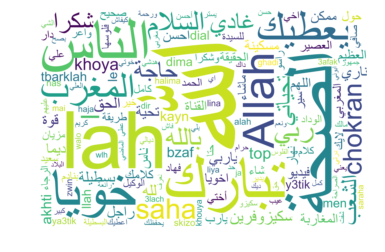

In [42]:
from wordcloud import WordCloud

data = arabic_reshaper.reshape(clean_non_offens_comments)
data = get_display(data)

WordCloud = WordCloud(font_path='arial.ttf', 
                      background_color='white',
                      max_words=150, 
                      mode='RGB', 
                      width=3000, 
                      height=2000,
                      collocations=False,
                      stopwords=STOPWORDS).generate(data)

plt.imshow(WordCloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [43]:
WordCloud.to_file('MA_NonOffens_wordCloud.png')

Try to apply stemming before getting the most frequent words

In [23]:
!pip install farasapy

In [24]:
from farasa.stemmer import FarasaStemmer
from pprint import pprint
stemmer = FarasaStemmer()

C:\Users\Dell\Anaconda3\lib\site-packages\urllib3\connectionpool.py:847: InsecureRequestWarning: Unverified HTTPS request is being made. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#ssl-warnings
  InsecureRequestWarning)


 17%|█████████████                                                                | 41.0M/241M [08:20<39:46, 83.9kiB/s]

[2022-06-30 13:10:53,868 - farasapy_logger - ERROR]: an error occured
[2022-06-30 13:10:53,872 - farasapy_logger - ERROR]: ('Connection broken: OSError("(10053, \'WSAECONNABORTED\')")', OSError("(10053, 'WSAECONNABORTED')"))


In [17]:
#We inspect the top stemmed words in the same sample used above
sample_df=df.iloc[3211:3221]
sample_df['content']= [stemmer.stem(c) for c in sample_df['content']]
topWords=get_top_n_words(sample_df['content'],n)
#pprint(topWords)
words = [w[0] for w in topWords]
print(words)

NameError: name 'stemmer' is not defined